In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../data/20181024_d1_0830_0900.csv", sep="[;]", index_col=False)
df

C:\Users\Fandingo\AppData\Local\Temp\ipykernel_26028\311512837.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../data/20181024_d1_0830_0900.csv", sep="[;]", index_col=False)
C:\Users\Fandingo\AppData\Local\Temp\ipykernel_26028\311512837.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("../data/20181024_d1_0830_0900.csv", sep="[;]", index_col=False)


,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time
0,1,Car,48.85,9.770344,37.977391,23.737688,4.9178,0.0518,-0.0299,0.0
1,2,Motorcycle,98.09,19.839417,37.977642,23.737400,16.9759,-0.0361,-0.0228,0.0
2,3,Motorcycle,63.80,18.228752,37.977997,23.737264,20.1906,-0.0795,-0.3395,0.0
3,4,Motorcycle,145.72,26.229014,37.978135,23.737072,2.7555,-0.0302,0.0948,0.0
4,5,Motorcycle,138.01,24.841425,37.978134,23.737103,0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...
917,918,Car,78.83,30.846243,37.980629,23.735083,38.2160,0.0372,-0.0533,809.6
918,919,Motorcycle,19.50,9.234518,37.979327,23.735628,2.9344,0.0011,-0.0237,811.2
919,920,Car,48.97,24.486209,37.978413,23.735528,22.8316,-0.0250,-0.0808,811.6
920,921,Motorcycle,46.68,30.007124,37.980020,23.736861,32.3581,-0.0493,-0.1050,813.2


In [19]:
with open("../data/20181024_d1_0830_0900.csv", 'r', encoding='ISO-8859-1') as f:
    lines = f.readlines()
    
lines_as_lists = [line.strip('\n').strip().strip(';').split(';') for line in lines] 


In [ ]:
cols = lines_as_lists.pop(0)

In [20]:

track_cols = cols[:4]
trajectory_cols = ['track_id'] + cols[4:]

In [21]:
track_info = []
trajectory_info = []
for row in lines_as_lists:
    track_id = row[0]

    # add the first 4 values to track_info
    track_info.append(row[:4]) 

    remaining_values = row[4:]
    # reshape the list into a matrix and add track_id
    trajectory_matrix = [ [track_id] + remaining_values[i:i+6] for i in range(0,len(remaining_values),6)]
    # add the matrix rows to trajectory_info
    trajectory_info = trajectory_info + trajectory_matrix
    
df_trajectory = pd.DataFrame(data= trajectory_info,columns=trajectory_cols)

df_trajectory.head()

,track_id,lat,lon,speed,lon_acc,lat_acc,time
0,1,37.977391,23.737688,4.9178,0.0518,-0.0299,0.000000
1,1,37.977391,23.737688,4.9207,-0.0124,-0.0354,0.040000
2,1,37.977391,23.737688,4.9160,-0.0519,-0.0413,0.080000
3,1,37.977390,23.737688,4.9057,-0.0914,-0.0478,0.120000
4,1,37.977390,23.737689,4.8871,-0.1679,-0.0550,0.160000


In [22]:
df_track_info = pd.DataFrame(data= track_info,columns=track_cols)

df_track_info.head()

# save track data to csv
df_track_info.to_csv

,track_id,type,traveled_d,avg_speed
0,1,Car,48.85,9.770344
1,2,Motorcycle,98.09,19.839417
2,3,Motorcycle,63.80,18.228752
3,4,Motorcycle,145.72,26.229014
4,5,Motorcycle,138.01,24.841425


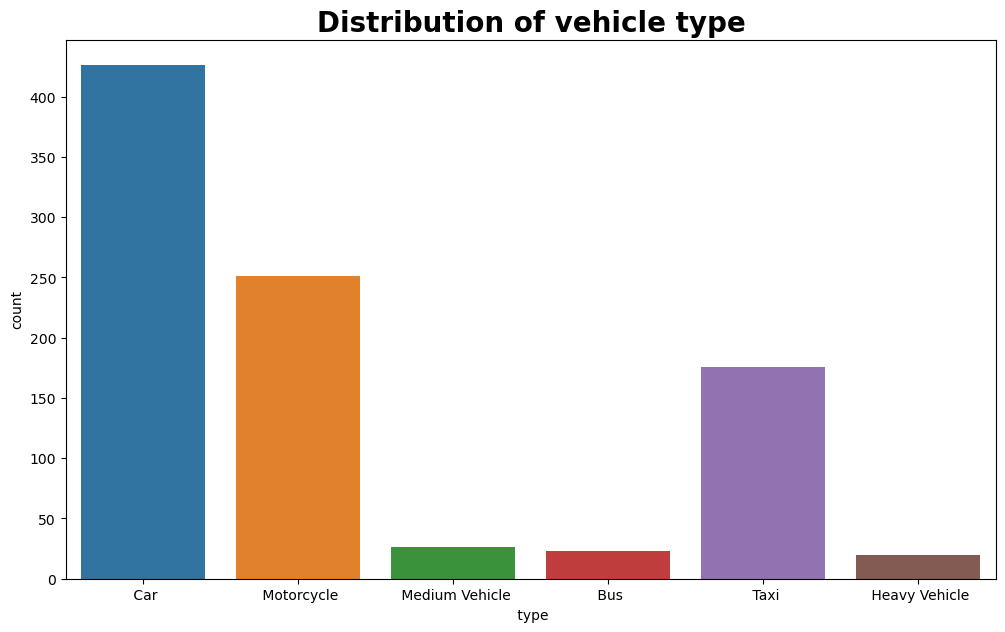

In [23]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=" type")
plt.title(f'Distribution of vehicle type', size=20, fontweight='bold')
plt.show()

In [25]:
!pip install apache-airflow

  Obtaining dependency information for apache-airflow from https://files.pythonhosted.org/packages/1f/4f/ec62f3dc4b78d787797b2f3e90b05e6e9018ea4c131cf5a857f802886dfc/apache_airflow-2.8.0-py3-none-any.whl.metadata
  Using cached apache_airflow-2.8.0-py3-none-any.whl.metadata (109 kB)
  Obtaining dependency information for alembic<2.0,>=1.6.3 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Using cached alembic-1.13.1-py3-none-any.whl.metadata (7.4 kB)
  Obtaining dependency information for argcomplete>=1.10 from https://files.pythonhosted.org/packages/73/44/42ff5ee76b3881bebe226614c658df9423fe8ddd3d7967e6850b008f4899/argcomplete-3.2.1-py3-none-any.whl.metadata
  Using cached argcomplete-3.2.1-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for asgiref from https://files.pythonhosted.org/packages/9b/80/b9051a4a07ad231558fcd8ffc89232711b4e618c15cb7a392a17384bbeef/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.5.2 which is incompatible.
dbt-semantic-interfaces 0.4.2 requires pydantic~=1.10, but you have pydantic 2.5.2 which is incompatible.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2023.12.2 which is incompatible.


In [29]:
!pip install apache-airflow-providers-postgres[amazon]

  Obtaining dependency information for apache-airflow-providers-amazon>=2.6.0 from https://files.pythonhosted.org/packages/d4/6a/10398b7b4225f5371763685ebb0b49b61aad20b0c6b95d71e81aa33e7184/apache_airflow_providers_amazon-8.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for boto3>=1.28.0 from https://files.pythonhosted.org/packages/59/17/dc9e3e2ff6c2b91a73fc75270e0971c97e42c0c1764743076c2da15d8d08/boto3-1.34.4-py3-none-any.whl.metadata
  Obtaining dependency information for botocore>=1.31.0 from https://files.pythonhosted.org/packages/5b/8d/5b8142232b9b248c0c71b0c7d45f4d85165543f0f3243998bc90c98cc236/botocore-1.34.4-py3-none-any.whl.metadata
  Obtaining dependency information for jsonpath_ng>=1.5.3 from https://files.pythonhosted.org/packages/92/8d/f6592a8267fcf85d4066605d671b509b456866b962554112c562d2b8be4b/jsonpath_ng-1.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for redshift_connector>=2.0.888 from https://files.pythonhosted.org/packages/52/2d

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.34.4 which is incompatible.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2023.12.2 which is incompatible.


In [24]:
from airflow import DAG

ModuleNotFoundError: No module named 'airflow'